# MBA FIAP Inteligência Artificial & Machine Learning

![Image of Dementia](img/ml.png)

## Programando IA com Python
## Projeto Final: Estimando Preços de Automóveis Utilizando Modelos de Regressão

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas. Por meio uma trilha guiada para construir um classificador que permitirá predizer o valor de um automóvel baseado em algumas características que cada grupo deverá escolher.

Este projeto poderá ser feita por grupos de até 4 pessoas.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| Allan Almeida             | RM 12345      | `2IA` |
| Luca Pasquale             | RM 12345      | `2IA` |
| Fabio             | RM 12345      | `2IA` |
| Integrante 4             | RM 12345      | `1IA` |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos e, até mesmo, trechos de código-fonte.

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Exploração de Dados__
2. __Preparação de Dados__
3. __Desenvolvimento do Modelo__
4. __Treinamento e Teste do Modelo__
5. __Validação e Otimização do Modelo__
6. __Conclusões Finais__

## Exploração de Dados

Os dados que serão utilizados foram modificados para propocionar uma experiência que explore melhor as técnicas de processamento e preparação de dados aprendidas.

Originalmente os dados foram extraídos do Kaggle deste [dataset](https://www.kaggle.com/nisargpatel/automobiles/data).

**Implementação** 

Carregue o dataset "automobile-mod.csv" que se encontra na pasta "data" e faça uma inspeção nas 10 primeiras linhas para identificação básica dos atributos.

O dataset oroginal "automobile.csv" se encontra na mesma pasta apenas como referência. Não deverá ser utilizado.

__Atualizado em 16/07/2017__

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

%matplotlib inline

In [3]:
data = pd.read_csv("data/automobile-mod.csv", delimiter= ";")
data.head()

make fuel_type aspiration number_of_doors   body_style drive_wheels  \
0  alfa-romero       gas        std             two  convertible          rwd   
1  alfa-romero       gas        std             two  convertible          rwd   
2  alfa-romero       gas        std             two    hatchback          rwd   
3         audi       gas        std            four        sedan          fwd   
4         audi       gas        std            four        sedan          4wd   

  engine_location  wheel_base  length  width  ...    engine_size  fuel_system  \
0           front        88.6   168.8   64.1  ...            130         mpfi   
1           front        88.6   168.8   64.1  ...            130         mpfi   
2           front        94.5   171.2   65.5  ...            152         mpfi   
3           front        99.8   176.6   66.2  ...            109         mpfi   
4           front        99.4   176.6   66.4  ...            136         mpfi   

   bore stroke  compression_ratio horsepower  peak_rpm  city_mpg  highway_mpg  \
0  3.47   2.68                9.0        111    5000.0      21.0         27.0   
1  3.47   2.68                9.0        111    5000.0      21.0         27.0   
2  2.68   3.47                9.0        154    5000.0      19.0         26.0   
3  3.19   3.40               10.0        102    5500.0      24.0         30.0   
4  3.19   3.40                8.0        115    5500.0      18.0         22.0   

   price  
0  13495  
1  16500  
2  16500  
3  13950  
4  17450  

[5 rows x 24 columns]

Relação das coluna e seu significado:

1. make: fabricante
2. fuel_type: tipo de combustível
3. aspiration: tipo de aspiração do motor, ex. turbo ou padrão (std)
4. body_style: estilo do carro, ex. sedan ou hatchback
5. drive_wheels: tração do carro, ex. rwd (tração traseira) ou frw (tração dianteira)
6. wheel_base: entre-eixos, distância entre o eixo dianteiro e o eixo traseiro
7. length: comprimento
8. width: largura
9. height: altura
10. curb_wheight: peso
11. engine_type: tipo do motor
12. number_of_cylinders: cilindrada, quantidade de cilindros
13. engine_size: tamanho do motor
14. fuel_system: sistema de injeção
15. bore: diâmetro do cilindro
16. stroke: diâmetro do pistão
17. compression_ratio: razão de compressão
18. horsepower: cavalo de força ou HP
19. peak_rpm: pico de RPM (rotações por minuto)
20. city_mpg: consumo em mpg (milhas por galão) na cidade
21. highway_mpg: consumo em mpg (milhas por galão) na estrada
22. price: preço (**Variável Alvo**)

### Correlacionamento dos atributos

Vamos utilizar algumas suposições e validar se elas são verdadeiras, por exemplo, o preço do carro pode variar com seu consumo, tamanho ou força? Vamos explorar estas hipósteses ou outras que o grupo julgue relevante.

wheel_base    length     width    height  curb_weight  \
wheel_base           1.000000  0.876024  0.814507  0.590742     0.782097   
length               0.876024  1.000000  0.857170  0.492063     0.880665   
width                0.814507  0.857170  1.000000  0.306002     0.866201   
height               0.590742  0.492063  0.306002  1.000000     0.307581   
curb_weight          0.782097  0.880665  0.866201  0.307581     1.000000   
engine_size          0.572027  0.685025  0.729436  0.074694     0.849072   
bore                 0.495210  0.610324  0.545028  0.186701     0.644871   
stroke               0.148239  0.116745  0.186352 -0.086508     0.162179   
compression_ratio    0.250313  0.159733  0.189867  0.259737     0.156433   
horsepower           0.372607  0.577923  0.613488 -0.085544     0.757762   
peak_rpm            -0.202727 -0.056354 -0.092631 -0.275686    -0.098857   
city_mpg            -0.454390 -0.633185 -0.620316 -0.069029    -0.714663   
highway_mpg         -0.566392 -0.709308 -0.697742 -0.117146    -0.800276   
price                0.584642  0.690628  0.751265  0.135486     0.834415   

                   engine_size      bore    stroke  compression_ratio  \
wheel_base            0.572027  0.495210  0.148239           0.250313   
length                0.685025  0.610324  0.116745           0.159733   
width                 0.729436  0.545028  0.186352           0.189867   
height                0.074694  0.186701 -0.086508           0.259737   
curb_weight           0.849072  0.644871  0.162179           0.156433   
engine_size           1.000000  0.577265  0.184605           0.028889   
bore                  0.577265  1.000000 -0.057887           0.001971   
stroke                0.184605 -0.057887  1.000000           0.183855   
compression_ratio     0.028889  0.001971  0.183855           1.000000   
horsepower            0.821685  0.563921  0.092493          -0.212984   
peak_rpm             -0.104959 -0.046081 -0.065078          -0.284202   
city_mpg             -0.619403 -0.542294 -0.079547           0.270039   
highway_mpg          -0.671867 -0.576674 -0.071479           0.207436   
price                 0.872335  0.543052  0.081434           0.071107   

                   horsepower  peak_rpm  city_mpg  highway_mpg     price  
wheel_base           0.372607 -0.202727 -0.454390    -0.566392  0.584642  
length               0.577923 -0.056354 -0.633185    -0.709308  0.690628  
width                0.613488 -0.092631 -0.620316    -0.697742  0.751265  
height              -0.085544 -0.275686 -0.069029    -0.117146  0.135486  
curb_weight          0.757762 -0.098857 -0.714663    -0.800276  0.834415  
engine_size          0.821685 -0.104959 -0.619403    -0.671867  0.872335  
bore                 0.563921 -0.046081 -0.542294    -0.576674  0.543052  
stroke               0.092493 -0.065078 -0.079547    -0.071479  0.081434  
compression_ratio   -0.212984 -0.284202  0.270039     0.207436  0.071107  
horsepower           1.000000  0.132510 -0.763573    -0.776634  0.810795  
peak_rpm             0.132510  1.000000 -0.127533    -0.050670 -0.006104  
city_mpg            -0.763573 -0.127533  1.000000     0.875933 -0.657661  
highway_mpg         -0.776634 -0.050670  0.875933     1.000000 -0.712812  
price                0.810795 -0.006104 -0.657661    -0.712812  1.000000

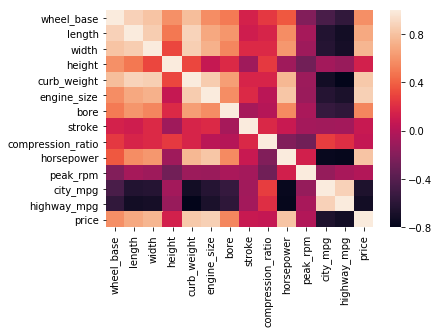

In [5]:
corr = data.corr()
sns.heatmap(corr)
corr

**Pergunta:** Cite um exemplo de pelo menos os 3 cenários propostos que corroboram a leitura dos dados apresentados, justique sua resposta.

**Resposta:** Preço não varia em relação ao consumo pois a correlação entre as variaveis "price" e "city_mpg" não apresentam um valor consideravel para se predizer que um varia com relação ao outro.

## Preparação dos Dados

### Identificação de Outliers Visualmente

Utilize visualizações gráficas para encontrar outliers em todos os atributos deste dataset.
Ainda não vamos remover ou atualizar os valores, por enquanto é uma análise exploratória.

Lembre-se que cada atributo possui um valor e dimensão diferente, portanto comparações devem estar em uma mesma base, por exemplo, __price__ não pode ser comparado com __width__ pois os eixos __y__ estarão sem proporção.

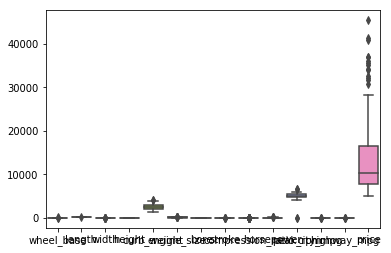

In [6]:
sns.boxplot(data=data)

Antes de explorar melhor as correlações, vamos analisar se há dados discrepante no conjunto de dados. Analisar os dados sem esta análise antes pode nos levar a algum viés indesejado.

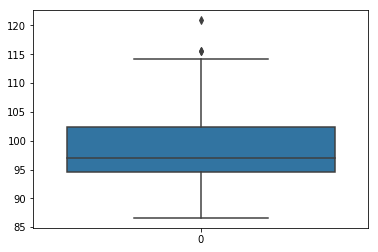

In [7]:
sns.boxplot(data=data['wheel_base'])

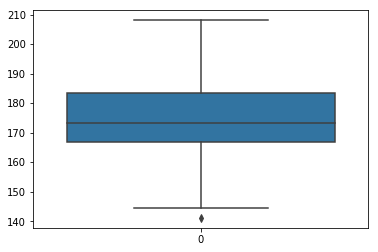

In [8]:
sns.boxplot(data=data['length'])

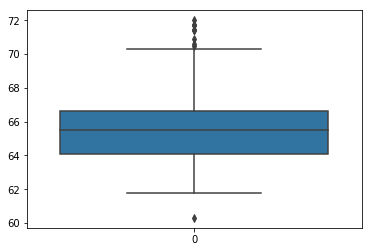

In [9]:
sns.boxplot(data=data['width'])

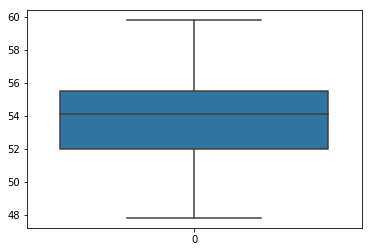

In [10]:
sns.boxplot(data=data['height'])

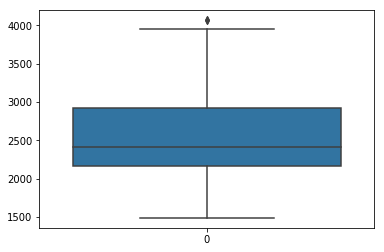

In [11]:
sns.boxplot(data=data['curb_weight'])

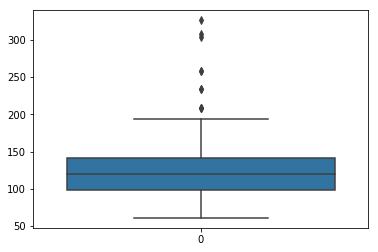

In [12]:
sns.boxplot(data=data['engine_size'])

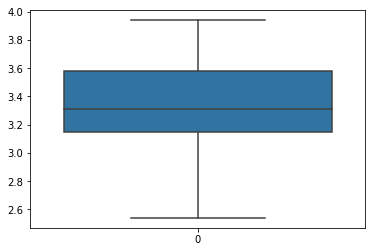

In [13]:
sns.boxplot(data=data['bore'])

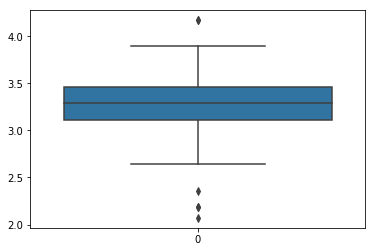

In [14]:
sns.boxplot(data=data['stroke'])

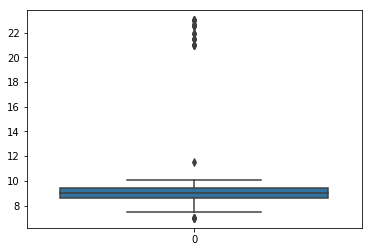

In [15]:
sns.boxplot(data=data['compression_ratio'])

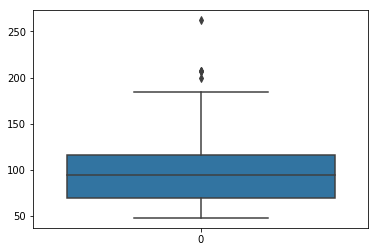

In [16]:
sns.boxplot(data=data['horsepower'])

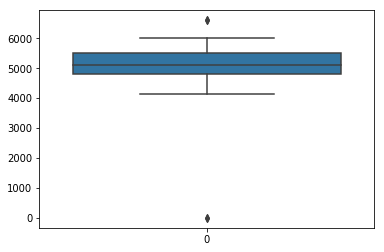

In [17]:
sns.boxplot(data=data['peak_rpm'])

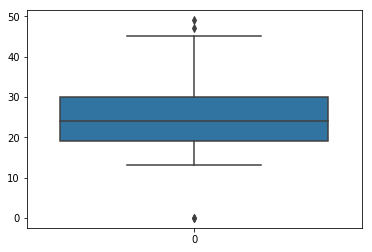

In [18]:
sns.boxplot(data=data['city_mpg'])

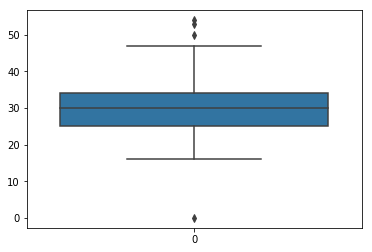

In [19]:
sns.boxplot(data=data['highway_mpg'])

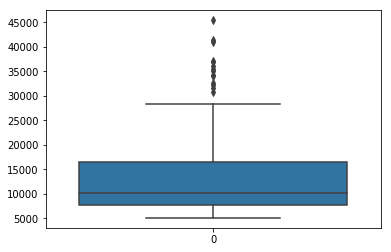

In [20]:
sns.boxplot(data=data['price'])

### Análise de valores inválidos

Analise e busque por valores considerados nulos.

In [21]:
data.isnull().any()

make                   False
fuel_type              False
aspiration             False
number_of_doors        False
body_style             False
drive_wheels           False
engine_location        False
wheel_base             False
length                 False
width                  False
height                 False
curb_weight            False
engine_type            False
number_of_cylinders    False
engine_size            False
fuel_system            False
bore                   False
stroke                 False
compression_ratio      False
horsepower             False
peak_rpm                True
city_mpg                True
highway_mpg             True
price                  False
dtype: bool

Para os dados considerados nulos, realize a imputação de dados utilizando um valor apropriado (note que pode haver dados paramétricos e dados numéricos). Justique sua resposta.

In [22]:
print(data[data["peak_rpm"].isnull()])
print(data[data["city_mpg"].isnull()])
print(data[data["highway_mpg"].isnull()])

           make fuel_type aspiration number_of_doors body_style drive_wheels  \
136      subaru       gas        std             two  hatchback          4wd   
184  volkswagen       gas        std            four      sedan          fwd   

    engine_location  wheel_base  length  width  ...    engine_size  \
136           front        93.3   157.3   63.8  ...            108   
184           front        97.3   171.7   65.5  ...            109   

     fuel_system  bore stroke  compression_ratio horsepower  peak_rpm  \
136         2bbl  3.62   2.64                8.7         73       NaN   
184         mpfi  3.19   3.40               10.0        100       NaN   

     city_mpg  highway_mpg  price  
136      26.0         31.0   7603  
184      26.0         32.0   9995  

[2 rows x 24 columns]
     make fuel_type aspiration number_of_doors body_style drive_wheels  \
36  honda       gas        std             two  hatchback          fwd   

   engine_location  wheel_base  length  width  .

In [23]:
data_filled = data.fillna(data.mean())
data_filled.head()

make fuel_type aspiration number_of_doors   body_style drive_wheels  \
0  alfa-romero       gas        std             two  convertible          rwd   
1  alfa-romero       gas        std             two  convertible          rwd   
2  alfa-romero       gas        std             two    hatchback          rwd   
3         audi       gas        std            four        sedan          fwd   
4         audi       gas        std            four        sedan          4wd   

  engine_location  wheel_base  length  width  ...    engine_size  fuel_system  \
0           front        88.6   168.8   64.1  ...            130         mpfi   
1           front        88.6   168.8   64.1  ...            130         mpfi   
2           front        94.5   171.2   65.5  ...            152         mpfi   
3           front        99.8   176.6   66.2  ...            109         mpfi   
4           front        99.4   176.6   66.4  ...            136         mpfi   

   bore stroke  compression_ratio horsepower  peak_rpm  city_mpg  highway_mpg  \
0  3.47   2.68                9.0        111    5000.0      21.0         27.0   
1  3.47   2.68                9.0        111    5000.0      21.0         27.0   
2  2.68   3.47                9.0        154    5000.0      19.0         26.0   
3  3.19   3.40               10.0        102    5500.0      24.0         30.0   
4  3.19   3.40                8.0        115    5500.0      18.0         22.0   

   price  
0  13495  
1  16500  
2  16500  
3  13950  
4  17450  

[5 rows x 24 columns]

### Análise de valores com valores iguais a 0

Analise se no conjunto de dados há valores iguais a 0 e verifique se faz parte do contexto. Caso não faça parte do contexto, utilize alguma técnica de imputação de dados apropriada.

Inspecione o dataset por dados iguais a 0.

In [24]:
data[data == 0].any()

make                   False
fuel_type              False
aspiration             False
number_of_doors        False
body_style             False
drive_wheels           False
engine_location        False
wheel_base             False
length                 False
width                  False
height                 False
curb_weight            False
engine_type            False
number_of_cylinders    False
engine_size            False
fuel_system            False
bore                   False
stroke                 False
compression_ratio      False
horsepower             False
peak_rpm               False
city_mpg               False
highway_mpg            False
price                  False
dtype: bool

A imputação de dados pode seguir algum padrão dos demais exemplos ou pode ser simplesmente atribuído um valor. Avalie tais condições de acordo com as inspeções de dados.

**Resposta**: Não é necessario imputação de dados uma vez que não há valores iguais a 0

### Análise Numérica de Outliers

Da análise visual de outliers realizada acima vamos utilizar uma métrica de verificação mais apropriada e objetiva afim de criar um patamar aceitável de dados não discrepantes.

Neste projeto vamos considerar [o Método Turco para identificar discrepantes](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/), que utiliza um __passo de limite__ que é 5 vezes (em nosso projeto) a diferença entre o terceiro (Q3) e o primeiro quartil (Q1). Deste modo, valores que sejam maiores que o Q3 + passo de limite ou menor Q2 - passo de limite sejam sinalizados como outliers.

Construa uma função que receba como parâmetro de entrada um série de dados e exiba os valores discrepantes. Utilize o boilerplate abaixo para completar as instruções faltantes.

*Dica: utilize a função do Numpy de percentil, np.percentile(serie, 25) para quartil 1 e np.percentile(serie, 75) para quartil 3.*

In [32]:
def identificacao_outlier(df, column_name): 
    q_1 = np.percentile(data[column_name], 25)
    q_3 = np.percentile(data[column_name], 75)
    limit_step = 5 * (q_3 - q_1)
    
    outlier_upper = data[data[column_name] > (q_3 + limit_step)]
    outlier_lower = data[data[column_name] < (q_1 - limit_step)]
    
    total_outliers = outlier_upper[column_name] + outlier_lower[column_name] 
    
    print(column_name, len(total_outliers) > 0)
    
identificacao_outlier(data_filled, "compression_ratio")
identificacao_outlier(data_filled, "price")

compression_ratio True
price False


**Pergunta:** Houve dados discrepantes localizados pela metodologia sugerida? Qual foi a sua conclusão, são realmente dados que devem ser removidos ou mantidos? Justifique.

**Resposta:** 


### Mapeamento de Dados Paramétricos

Os algoritmos de aprendizado de máquina precisam receber dados que sejam inteiramente numéricos. Dados que representam uma classificação como por exemplo um tipo de carro, como sedan ou hatchback, deve ser convertido em um valor numérico associado, como por exemplo 1 ou 2.

Crie uma função que receba uma lista única e retorne um dicionário com a categoria e um código numérico crescente e incremental para posteriormente utilizarmos como mapeamento.

In [33]:
def mapear_serie(serie):
    dict_gen = {}
    
    i = 0
    for item in serie:
        dict_gen[item] = i
        i += 1
        
    return dict_gen

def replace_parametricos(df, column):
    unique_values = df[column].unique()
    mapping = mapear_serie(unique_values)

    df[column] = df[column].map(mapping)
    return df
    
data_param = data_filled.copy()
data_param = replace_parametricos(data_param, 'make')
data_param = replace_parametricos(data_param, 'fuel_type')
data_param = replace_parametricos(data_param, 'aspiration')
data_param = replace_parametricos(data_param, 'number_of_doors')
data_param = replace_parametricos(data_param, 'body_style')
data_param = replace_parametricos(data_param, 'drive_wheels')
data_param = replace_parametricos(data_param, 'engine_location')
data_param = replace_parametricos(data_param, 'engine_type')
data_param = replace_parametricos(data_param, 'number_of_cylinders')
data_param = replace_parametricos(data_param, 'fuel_system')

data_param.head()

make  fuel_type  aspiration  number_of_doors  body_style  drive_wheels  \
0     0          0           0                0           0             0   
1     0          0           0                0           0             0   
2     0          0           0                0           1             0   
3     1          0           0                1           2             1   
4     1          0           0                1           2             2   

   engine_location  wheel_base  length  width  ...    engine_size  \
0                0        88.6   168.8   64.1  ...            130   
1                0        88.6   168.8   64.1  ...            130   
2                0        94.5   171.2   65.5  ...            152   
3                0        99.8   176.6   66.2  ...            109   
4                0        99.4   176.6   66.4  ...            136   

   fuel_system  bore  stroke  compression_ratio  horsepower  peak_rpm  \
0            0  3.47    2.68                9.0         111    5000.0   
1            0  3.47    2.68                9.0         111    5000.0   
2            0  2.68    3.47                9.0         154    5000.0   
3            0  3.19    3.40               10.0         102    5500.0   
4            0  3.19    3.40                8.0         115    5500.0   

   city_mpg  highway_mpg  price  
0      21.0         27.0  13495  
1      21.0         27.0  16500  
2      19.0         26.0  16500  
3      24.0         30.0  13950  
4      18.0         22.0  17450  

[5 rows x 24 columns]

Com a funcão criada, crie dicionários para cada coluna paramétrica. Lembre-se que é necessário passar somente valores únicos.

*Dica: utilize a função unique() do dataframe para obter valores únicos de uma determinada série (ou coluna).*

In [10]:
# IMPLEMENTAÇÃO 



Até este momento seu conjunto de dados não deve conter nenhum dado paramétrico. Todos os dados armazenados com valores como texto, por exemplo, "diese", "gas" deve estar preenchido com valores numéricos, como 1 ou 2.

Inspecione seus dados e certifique de que tudo está certo.

*Dica: utilize uma inspeção simples visual, com 20 amostras.*

In [11]:
#IMPLEMENTAÇÃO



## Desenvolvimento do Modelo

O conjunto de dados que temos a nossa disposição indica a aplicação de um modelo voltado a regressão, ou seja, queremos prever um preço de um veículo dada certas condições. É um problema típico de predição de série numérica.

Podemos aplicar quaisquer algoritmos de regressão existente que tenha aplicação de classificação, pois é de um domínio diferente.

Iremos explorar 3 modelos de algoritmos de regressão para testar a performance de cada um deles. Ao final será eleito o que apresentar melhor performance de pontuação R2.

Os algoritmos são:

1. [Regressão Linear](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)
2. [Regressão de Árvore de Decisão](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
3. [Regressão Ridge](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

**Pergunta:** Explique como cada modelo de regressão funciona, indicando pelo menos um caso de uso em cada um deles.

**Resposta:**

Antes de partimos para o treinamento do modelo, precisaremos separar os dados em subconjuntos para permitir avaliar adequadamente o modelo.

Uma boa razão de tamanho de conjunto de treinamento e testes é 80% e 20% ou ainda, 70% e 30%. O importante é não misturar dados de treinamento com os de teste para termos uma ideia melhor sobre a performance do modelo com dados previametne não treinados.

Antes de separarmos os dados, a partir das análises realizadas anteriormente, quais seriam os atributos a serem utilizados e qual seria o atributo preditor?

In [34]:
df_x = data_param.loc[:, data_param.columns != 'price']
df_y = data_param['price']


Crie subsets de treinamento e teste utilizado uma razão adequada de tamanho.
Utilze o ```train_test_split``` passando como parâmetros

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = .3, random_state = 42)
x_train.head()

make  fuel_type  aspiration  number_of_doors  body_style  drive_wheels  \
97     12          0           0                1           2             1   
31      5          0           0                0           1             1   
12      2          0           0                1           2             0   
35      5          0           0                1           3             1   
119    14          0           0                1           2             1   

     engine_location  wheel_base  length  width     ...       \
97                 0        97.2   173.4   65.2     ...        
31                 0        93.7   150.0   64.0     ...        
12                 0       101.2   176.8   64.8     ...        
35                 0        96.5   157.1   63.9     ...        
119                0        93.7   167.3   63.8     ...        

     number_of_cylinders  engine_size  fuel_system  bore  stroke  \
97                     0          120            1  3.33    3.47   
31                     0           79            3  2.91    3.07   
12                     1          164            0  3.31    3.19   
35                     0           92            3  2.92    3.41   
119                    0           98            1  2.97    3.23   

     compression_ratio  horsepower  peak_rpm  city_mpg  highway_mpg  
97                 8.5          97    5200.0      27.0         34.0  
31                10.1          60    5500.0      38.0         42.0  
12                 9.0         121    4250.0      21.0         28.0  
35                 9.2          76       0.0      30.0         34.0  
119                9.4          68    5500.0      31.0         38.0  

[5 rows x 23 columns]

In [49]:
y_train.head()

97      9549
31      5399
12     21105
35      7295
119     7609
Name: price, dtype: int64

Inspecione cada subconjunto de dados obtidos do ```train_test_split```. Note que nos conjuntos X devemos ter atributos, logo é esperado uma matriz com mais de uma coluna. Nos conjuntos y, é a classe de predição, logo é esperado apenas um atributo.

In [40]:
total_x = len(data_param)
percent_treino_x = len(x_train) / total_x
percent_teste_x = len(x_test) / total_x
print('Treino: {0:.2f}%'.format(percent_treino_x * 100))
print('Teste: {0:.2f}%'.format(percent_teste_x * 100))

Treino: 69.65%
Teste: 30.35%


In [41]:
total_y = len(data_param)
percent_treino_y = len(y_train) / total
percent_teste_y = len(y_test) / total
print('Treino: {0:.2f}%'.format(percent_treino_y * 100))
print('Teste: {0:.2f}%'.format(percent_teste_y * 100))


Treino: 69.65%
Teste: 30.35%


Verifique também se a razão dos conjuntos está coerente com a divisão estabelecida. Para estes cálculos divia o número de itens do conjunto de treino pelo total e também o de testes pelo total.

In [5]:
#IMPLEMENTAÇÃO



## Treinamento e teste do modelo

Após separarmos os dados adequadamente, selecionar os atributos que irão compor como o modelo deve treinar e qual atributo deve perseguir, o próximo passo é treinar este modelo e verificar, pelos testes, sua performance.

Este estudo também irá levar a escolhermos qual algoritmo devemos utilizar dentre os três selecionados neste ajuste.

Para avaliarmos a performance dos modelos, vamos criar uma função que determinará a pontuação R2.

Não esqueça de avaliar os conjuntos de dados de treino (```X_train```, ```y_train``` e de teste, ```X_test``` e ```y_test```)

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

def pontuacao(modelo, x_test, y_test):
    y_pred = modelo.predict(x_test)
    print("%s R2 score: %.2f" %(modelo,r2_score(y_test, y_pred)))

### Regressão Linear

Utilize para a variável preditora a função ```.ravel()``` para converter os dados no formato que o ```sklearn``` espera.

In [59]:
from sklearn import linear_model

lr_model = linear_model.LinearRegression(normalize=True)
lr_model.fit(x_train, y_train.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [61]:
print("Pontuação de R2 para Treino:")
pontuacao(lr_model, x_train, y_train)
print("\n")
print("Pontuação de R2 para teste:")
pontuacao(lr_model, x_test, y_test)

Pontuação de R2 para Treino:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True) R2 score: 0.91


Pontuação de R2 para teste:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True) R2 score: 0.87


### Regressão de árvore de Decisão

In [63]:
from sklearn import tree

dtr_model = tree.DecisionTreeRegressor(random_state=7).fit(x_train, y_train.ravel())


Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [64]:
print("Pontuação de R2 para Treino:")
pontuacao(dtr_model, x_train, y_train)
print("\n")
print("Pontuação de R2 para teste:")
pontuacao(dtr_model, x_test, y_test)

Pontuação de R2 para Treino:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=7, splitter='best') R2 score: 1.00


Pontuação de R2 para teste:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=7, splitter='best') R2 score: 0.89


### Regressão Ridge

In [65]:
lrr_model = linear_model.Ridge()


lrr_model = linear_model.Ridge(alpha=0.15).fit(x_train, y_train.ravel())

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [66]:
print("Pontuação de R2 para Treino:")
pontuacao(lrr_model, x_train, y_train)
print("\n")
print("Pontuação de R2 para teste:")
pontuacao(lrr_model, x_test, y_test)

Pontuação de R2 para Treino:
Ridge(alpha=0.15, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) R2 score: 0.91


Pontuação de R2 para teste:
Ridge(alpha=0.15, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) R2 score: 0.87


**Pergunta:** Nesta análise preliminar, como foi a performance de cada algoritmo? Explique os resultados e detalhe como a característica de cada algoritmo influenciou no resultado.

**Resposta:**

## Validação e Otimização do Modelo

Cada algoritmo de modelo pode oferecer a possibilidade de ajustes de seus parâmetros. Tais ajustes podem contribuir para melhorar ou piorar o modelo, portanto esta fase de otimização e validação é importante entender o patamar de partida, com os valores padrões obtidos nos passos anteriores versus as otimizações.

É comum que as otimizações não sejam capazes de alterar os patamares padrão.

O Scikit Learn oferece uma forma simplificada de testar diversas condições de parâmetros diferentes por meio do ```GridSearchCV```. Após diversos testes é apresentado os parâmetros que obtiveram os melhores resultados.

### Regulação dos parâmetros dos modelos

Analise os parâmetros possíveis de cada algortimo de regressão e crie um dicionário para ser utilizado no ```GridSearchCV```.
O dicionário é composto pelo nome do parâmetro como chave. Seu valor será uma lista de valores que se deseja otimizar. Não deixe de revisar a [documentação](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Verfique a pontuação R2 para os conjuntos de dados de treino e de teste, pois nem sempre preditores que se saem bem durante o treinamento terão a mesma performance com os dados de teste.

### Regulação do Modelo de Regressão Linear

Escolha quais atributos incluir na variável ```parameters```para serem otimizados. Essa variável é um dicionário onde cada chave representa uma configuração do modelo, o valor pode ser único ou uma lista, neste caso utilize ```[]``` para incluir múltiplos valores. Como nosso problema é relacionado a regressão, utilize a pontuação R2 em ```scoring``` na configuração do ```GridSearchCV```. 

In [67]:
from sklearn.model_selection import GridSearchCV
        
parameters = {}
opt_model_lr = GridSearchCV(lr_model, parameters, scoring='r2')
opt_model_lr.fit(x_train, y_train.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True),
       fit_params=None, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

Calcule as pontuações para o melhor estimador com dados de treino.

In [68]:
opt_model_lr.score(x_train, y_train.ravel()), opt_model_lr.best_estimator_

(0.9116539369851432,
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True))

E também para os dados de testes.

In [69]:
opt_model_lr.score(x_test, y_test.ravel()), opt_model_lr.best_estimator_

(0.8670330554716765,
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True))

### Regulação do Modelo de Regressão de Árvore de Decisão

In [71]:
parameters = {}
opt_model_dtr = GridSearchCV(dtr_model, parameters, scoring='r2')
opt_model_dtr.fit(x_train, y_train.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=7, splitter='best'),
       fit_params=None, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

Pontuação dos dados de treino.

In [72]:
opt_model_dtr.score(x_train, y_train.ravel()), opt_model_dtr.best_estimator_

(0.9989618661501127,
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=7, splitter='best'))

Pontuação dos dados de teste.

In [73]:
opt_model_dtr.score(x_test, y_test.ravel()), opt_model_dtr.best_estimator_

(0.8924915128570127,
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=7, splitter='best'))

### Regulação do Modelo de Regressão Ridge

In [74]:
parameters = {}

opt_model_lrr = GridSearchCV(lrr_model, parameters, scoring='r2')
opt_model_lrr.fit(x_train, y_train.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=0.15, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

Pontuação dos dados de treino.

In [76]:
opt_model_lrr.score(x_train, y_train.ravel()), opt_model_lrr.best_estimator_

(0.9105887453047727,
 Ridge(alpha=0.15, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='auto', tol=0.001))

Pontuação dos dados de teste.

In [78]:
opt_model_lrr.score(x_test, y_test.ravel()), opt_model_lrr.best_estimator_

(0.8684361143564945,
 Ridge(alpha=0.15, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='auto', tol=0.001))

Sumarize na tabela abaixo os indicadores para cada um dos preditores e suas respectivas pontuações para os conjuntos de dados de treino e de testes

|                     | Regressão linear | Regressão árvore de decisão | Regressão ridge |
|:---------------------|:------------------:|:-----------------------------:|:-----------------:|
| R2 treino |      X           |      X                       |   X              |
| R2 teste  |      X            |      X                       |   X              |


**Pergunta:** Qual dos algoritmos de regressão obteve os melhores resultados? Quais caracaterísticas deste algoritmo podem ajudar a justificar tal resultado?

**Resposta:**

### Implementação do algoritmo otimizado

Configure o classificador selecionado com os parâmetros otimizados obtidos anteriormente.

In [79]:
from sklearn.tree import DecisionTreeRegressor

dtr_model_otimizado = DecisionTreeRegressor(random_state=6, max_depth=8, max_features=8, min_samples_split=0.15).fit(x_train, y_train.ravel())

### Teste com exemplos

Utilize 3 exemplos criados por você mesmo para obter um valor de venda de veículo. Escolha caracaterísticas que demonstrem como o regressor deveria se comportar. Para tanto, imagine exemplos dos quais você espera um valor baixo, mediano e alto do preço do veículo baseado nos atributos escolhidos

In [80]:
#Lembre-se que os atributos são os armazenados na lista feature_col_names

feature_col_names

NameError: name 'feature_col_names' is not defined

In [81]:
#IMPLEMENTAÇÃO
#A entrada de dados deve ser uma matriz do seguinte formato, note que há dois colchetes pois é uma 
#matriz dentro de outra matriz [[a,b,c,d,e]]

test_example_1 = [[]]
test_example_2 = [[]]
test_example_3 = [[]]


## Conclusões finais

Este projeto apresentou de forma simplifcada o __Worflow de Machine Learning__ que pode servir como base para estudos relacionados a classificação ou predição de séries numéricas.

A fase de preparação, evidenciada no projeto, é uma das mais importantes da qual se precisa investir um bom tempo para dar os dados organizados e confiáveis, pois é a forma como os classificadores irão aprender com os exemplos e tentarão desvencilhar de efeitos indesejáveis como os vieses.

Regressores são um tipo de algoritmo de machine learning que pode ser aplicado em diversas áreas das quais é necessário predizer um número baseado em um conjunto de dados numéricos ou série numérica, logo sua aplicação é bem ampla.

**Pergunta:** Seu modelo conseguiu prever adequadamente novos dados a partir do treinamento dos dados de teste? O que você faria diferente?

**Resposta:**

**Pergunta:**: Em que outras áreas você poderia aplicar estes tipos de algoritmos de regressão de aprendizado de máquina?

**Resposta**: